# Stock Price Forecasting with AutoTS

This study forecasts Apple Inc. stock prices using machine learning. It employs yfinance for data acquisition, AutoTS for ensemble modeling (ARIMA, ETS, Rolling Regression), and Matplotlib for visualization. The approach predicts 5-day price trajectories based on historical patterns and statistical inference.

Dataset : Apple Inc. (AAPL) stock prices between 2024-01-01 and 2024-06-01 (1 month, yfinance)

Example Solution : https://thecleverprogrammer.com/2021/04/19/autots-in-python-tutorial/

Hugging Face : https://huggingface.co/spaces/alperugurcan/stock-price-predict

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

aapl_data= yf.download(tickers="AAPL", period="1mo", interval="1d")

print(aapl_data.head())

aapl_data.to_csv("aapl_data.csv")


[*********************100%***********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-08-28  227.919998  229.860001  225.679993  226.490005  226.490005   
2024-08-29  230.100006  232.919998  228.880005  229.789993  229.789993   
2024-08-30  230.190002  230.399994  227.479996  229.000000  229.000000   
2024-09-03  228.550003  229.000000  221.169998  222.770004  222.770004   
2024-09-04  221.660004  221.779999  217.479996  220.850006  220.850006   

              Volume  
Date                  
2024-08-28  38052200  
2024-08-29  51906300  
2024-08-30  52990800  
2024-09-03  50190600  
2024-09-04  43840200  


In [3]:
aapl_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-28,227.919998,229.860001,225.679993,226.490005,226.490005,38052200
2024-08-29,230.100006,232.919998,228.880005,229.789993,229.789993,51906300
2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800
2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50190600
2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200


In [4]:
aapl_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2024-08-28 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       22 non-null     float64
 1   High       22 non-null     float64
 2   Low        22 non-null     float64
 3   Close      22 non-null     float64
 4   Adj Close  22 non-null     float64
 5   Volume     22 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 1.2 KB


In [5]:
aapl_data.describe()


,Open,High,Low,Close,Adj Close,Volume
count,22.000000,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,224.216365,225.998181,221.887273,223.974546,223.974546,6.002342e+07
std,4.539872,4.628742,4.611149,3.977491,3.977491,5.857503e+07
min,215.750000,216.899994,213.919998,216.320007,216.320007,3.399360e+07
25%,221.502506,222.805004,217.627495,220.865005,220.865005,3.911632e+07
50%,224.439995,226.384995,221.715004,222.770004,222.770004,4.697115e+07
75%,228.325005,229.502502,225.717495,227.482502,227.482502,5.385720e+07
max,230.190002,233.089996,228.880005,229.789993,229.789993,3.186799e+08


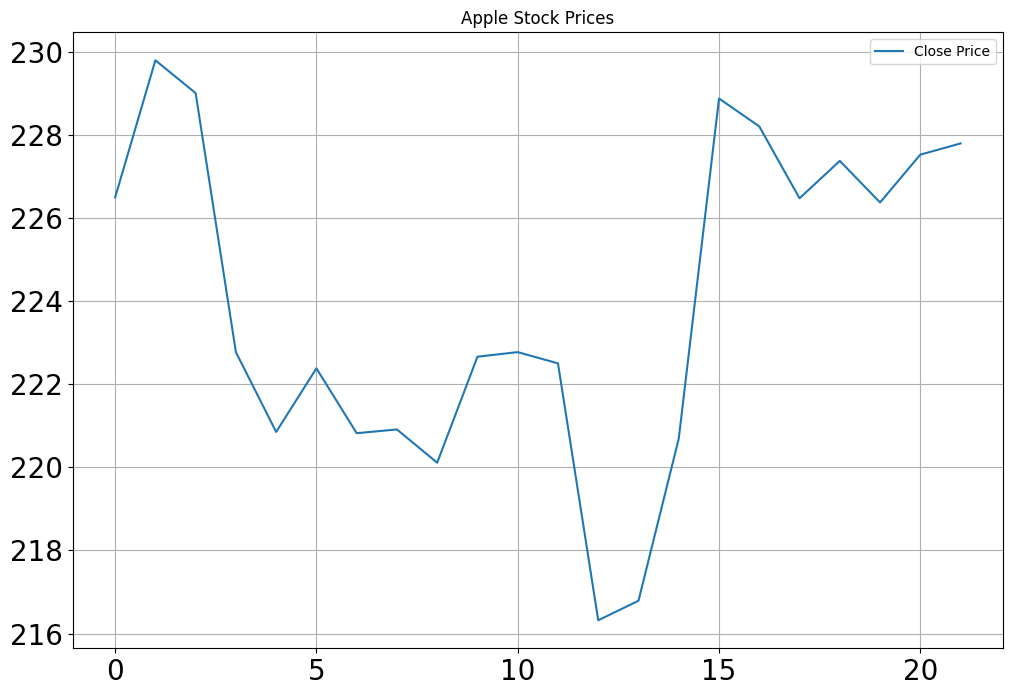

In [6]:
aapl_data = aapl_data.reset_index()[["Date", "Close"]]
aapl_data["Date"] = pd.to_datetime(aapl_data.Date)
aapl_data["Close"].plot(figsize=(12, 8), title="Apple Stock Prices", fontsize=20, label="Close Price")
plt.legend()
plt.grid()
plt.show()

In [7]:
from autots import AutoTS

model = AutoTS(
    forecast_length=5,  # 5 günlük tahmin
    frequency='infer',
    ensemble='simple',
    drop_data_older_than_periods=30,  # Son 1 aylık veri
    max_generations=3,
    num_validations=2,
    models_to_validate=0.2,
    model_list=[
        'ARIMA',
        'ETS',
        'RollingRegression',
        'GLS',
        'SeasonalNaive'
    ]  # Hisse senedi tahmini için uygun modeller
)

model = model.fit(aapl_data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()
forecast = prediction.forecast

print(forecast)

Using 1 cpus for n_jobs.
Data frequency is: B, used frequency is: B
Model Number: 1 with model ARIMA in generation 0 of 3
Model Number: 2 with model ETS in generation 0 of 3
Model Number: 3 with model ETS in generation 0 of 3
Model Number: 4 with model GLS in generation 0 of 3
Model Number: 5 with model GLS in generation 0 of 3
Model Number: 6 with model SeasonalNaive in generation 0 of 3
Model Number: 7 with model SeasonalNaive in generation 0 of 3
Model Number: 8 with model SeasonalNaive in generation 0 of 3
Model Number: 9 with model SeasonalNaive in generation 0 of 3
Model Number: 10 with model ETS in generation 0 of 3
Model Number: 11 with model SeasonalNaive in generation 0 of 3
Model Number: 12 with model RollingRegression in generation 0 of 3
Template Eval Error: ValueError('future_regressor not supplied, necessary for regression_type') in model 12 in generation 0: RollingRegression
Model Number: 13 with model RollingRegression in generation 0 of 3
Template Eval Error: ValueErr

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 17 with model GLS in generation 0 of 3
Model Number: 18 with model SeasonalNaive in generation 0 of 3
Model Number: 19 with model ETS in generation 0 of 3
Model Number: 20 with model ETS in generation 0 of 3
Template Eval Error: Exception("Transformer STLFilter failed on fit from params ffill_mean_biased {'0': {'lag': 7, 'fill': 'bfill'}, '1': {}, '2': {'method': None, 'method_params': None, 'transform_dict': None, 'reverse_alignment': True, 'isolated_only': False, 'fillna': 3.0}, '3': {'method': 0.2}, '4': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '5': {'model_name': 'local_linear_trend_ets_aan', 'state_transition': [[1, 1], [0, 1]], 'process_noise': [[1.3, 0.0], [0.0, 0.1]], 'observation_model': [[1, 0]], 'observation_noise': 0.5, 'em_iter': None, 'on_transform': False, 'on_inverse': True}}") in model 20 in generation 0: ETS
Model Number: 21 with model SeasonalNaive in generation 0 of 3
Model Number: 22 with model ARIMA in generation 0 of 3
Model Number: 2

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\tools\thresholding.py:204: RuntimeWarning: overflow encountered in scalar power
  (1 + mean_perc_decrease) ** self.mean_weight


Model Number: 36 with model GLS in generation 0 of 3
Model Number: 37 with model ARIMA in generation 0 of 3
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 37 in generation 0: ARIMA
Model Number: 38 with model RollingRegression in generation 0 of 3
Template Eval Error: ValueError('Input X contains NaN.\nElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values') in model 38 in generation 0: 

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Model Number: 54 with model GLS in generation 1 of 3
Model Number: 55 with model GLS in generation 1 of 3
Model Number: 56 with model ETS in generation 1 of 3
Model Number: 57 with model GLS in generation 1 of 3
Model Number: 58 with model ARIMA in generation 1 of 3
Model Number: 59 with model RollingRegression in generation 1 of 3
Template Eval Error: ValueError('Input X contains NaN.\nNystroem does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values')

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(



Model Number: 72 with model ETS in generation 2 of 3
Model Number: 73 with model RollingRegression in generation 2 of 3


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 74 with model SeasonalNaive in generation 2 of 3


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid featu

Model Number: 75 with model SeasonalNaive in generation 2 of 3
Model Number: 76 with model ETS in generation 2 of 3
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params quadratic {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.003, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 5, 'n_estimators': 100}, 'datepart_method': 'common_fourier'}, 'fillna': 'ffill'}}") in model 76 in generation 2: ETS
Model Number: 77 with model SeasonalNaive in generation 2 of 3
Model Number: 78 with model GLS in generation 2 of 3
Model Number: 79 with model GLS in generation 2 of 3
Model Number: 80 with model GLS in generation 2 of 3
Model Number: 81 with model SeasonalNaive in generation 2 of 3
Model Number: 82 with model GLS in generation 2 of 3
Model Number: 83 with model ETS in generation 2 of 3


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_pca.py:653: RuntimeWarning: invalid value encountered in divide
  explained_variance_ratio_ = explained_variance_ / total_var


Model Number: 84 with model ETS in generation 2 of 3
Model Number: 85 with model ETS in generation 2 of 3
Model Number: 86 with model ETS in generation 2 of 3
Model Number: 87 with model SeasonalNaive in generation 2 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from params rolling_mean_24 {'0': {}, '1': {'model': 'middle', 'decimals': 2, 'on_transform': False, 'on_inverse': True}, '2': {'method': 'mad', 'method_params': {'distribution': 'uniform', 'alpha': 0.05}, 'fillna': 'ffill', 'transform_dict': None, 'isolated_only': False}, '3': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '4': {}}") in model 87 in generation 2: SeasonalNaive
Model Number: 88 with model RollingRegression in generation 2 of 3
Template Eval Error: ValueError('Input X contains NaN.\nBayesianRidge does not accept missing values encoded as NaN natively. For supervised learning, you might want to

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warni

Model Number: 96 with model GLS in generation 3 of 3
Model Number: 97 with model ETS in generation 3 of 3
Model Number: 98 with model ETS in generation 3 of 3
Model Number: 99 with model GLS in generation 3 of 3
Template Eval Error: Exception("Transformer Cointegration failed on fit from params akima {'0': {'fixed': True, 'window': 3}, '1': {}, '2': {}, '3': {}, '4': {}, '5': {'det_order': 1, 'k_ar_diff': 2}}") in model 99 in generation 3: GLS
Model Number: 100 with model SeasonalNaive in generation 3 of 3
Model Number: 101 with model GLS in generation 3 of 3
Model Number: 102 with model SeasonalNaive in generation 3 of 3
Model Number: 103 with model SeasonalNaive in generation 3 of 3
Model Number: 104 with model ETS in generation 3 of 3
Model Number: 105 with model ETS in generation 3 of 3
Model Number: 106 with model SeasonalNaive in generation 3 of 3
Model Number: 107 with model ETS in generation 3 of 3
Template Eval Error: Exception("Transformer AlignLastValue failed on fit from pa

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 120 with model Ensemble in generation 4 of Ensembles
Model Number: 121 with model Ensemble in generation 4 of Ensembles
Validation Round: 1
Model Number: 1 of 24 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 2.39: 
Model Number: 2 of 24 with model Ensemble for Validation 1
2 - Ensemble with avg smape 2.39: 
Model Number: 3 of 24 with model Ensemble for Validation 1
3 - Ensemble with avg smape 2.4: 
Model Number: 4 of 24 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

4 - Ensemble with avg smape 2.41: 
Model Number: 5 of 24 with model Ensemble for Validation 1
📈 5 - Ensemble with avg smape 2.32: 
Model Number: 6 of 24 with model Ensemble for Validation 1
6 - Ensemble with avg smape 2.44: 
Model Number: 7 of 24 with model GLS for Validation 1
7 - GLS with avg smape 2.48: 
Model Number: 8 of 24 with model GLS for Validation 1
8 - GLS with avg smape 2.51: 
Model Number: 9 of 24 with model ETS for Validation 1
9 - ETS with avg smape 2.32: 
Model Number: 10 of 24 with model SeasonalNaive for Validation 1
10 - SeasonalNaive with avg smape 2.33: 
Model Number: 11 of 24 with model GLS for Validation 1
11 - GLS with avg smape 2.37: 
Model Number: 12 of 24 with model SeasonalNaive for Validation 1
📈 12 - SeasonalNaive with avg smape 2.29: 
Model Number: 13 of 24 with model GLS for Validation 1
13 - GLS with avg smape 2.48: 
Model Number: 14 of 24 with model SeasonalNaive for Validation 1
14 - SeasonalNaive with avg smape 2.63: 
Model Number: 15 of 24 with mod

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

20 - RollingRegression with avg smape 2.32: 
Model Number: 21 of 24 with model ETS for Validation 1
21 - ETS with avg smape 2.32: 
Model Number: 22 of 24 with model ETS for Validation 1
22 - ETS with avg smape 2.32: 
Model Number: 23 of 24 with model GLS for Validation 1
23 - GLS with avg smape 2.31: 
Model Number: 24 of 24 with model SeasonalNaive for Validation 1
24 - SeasonalNaive with avg smape 2.35: 
Validation Round: 2
Model Number: 1 of 24 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 0.99: 
Model Number: 2 of 24 with model Ensemble for Validation 2
2 - Ensemble with avg smape 0.99: 
Model Number: 3 of 24 with model Ensemble for Validation 2
3 - Ensemble with avg smape 1.0: 
Model Number: 4 of 24 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

📈 4 - Ensemble with avg smape 0.93: 
Model Number: 5 of 24 with model Ensemble for Validation 2
Traceback (most recent call last):
  File "C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\tools\transform.py", line 5489, in _fit
    df = self._fit_one(df, i)
  File "C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\tools\transform.py", line 5466, in _fit_one
    df = self.transformers[i].fit_transform(df)
  File "C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\tools\transform.py", line 524, in fit_transform
    return self.transform(df)
  File "C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\tools\transform.py", line 554, in transform
    df = df.apply(
  File "c:\Python310\lib\site-packages\pandas\core\frame.py", line 10374, in apply
    return op.apply().__finalize__(self, method="apply")
  File "c:\Python310\lib\site-packages\pandas\core\apply.py", line 916, in apply
    retur

C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

21 - ETS with avg smape 0.57: 
Model Number: 22 of 24 with model ETS for Validation 2
22 - ETS with avg smape 0.57: 
Model Number: 23 of 24 with model GLS for Validation 2
23 - GLS with avg smape 0.56: 
Model Number: 24 of 24 with model SeasonalNaive for Validation 2
24 - SeasonalNaive with avg smape 0.53: 


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 170 with model Ensemble in generation 5 of Ensembles
Model Number: 171 with model Ensemble in generation 5 of Ensembles
Model Number: 172 with model Ensemble in generation 5 of Ensembles


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 173 with model Ensemble in generation 5 of Ensembles
Model Number: 174 with model Ensemble in generation 5 of Ensembles


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 175 with model Ensemble in generation 5 of Ensembles


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 176 with model Ensemble in generation 5 of Ensembles


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Model Number: 177 with model Ensemble in generation 5 of Ensembles


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 2.32: 
Model Number: 2 of 8 with model Ensemble for Validation 1
2 - Ensemble with avg smape 2.32: 
Model Number: 3 of 8 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

3 - Ensemble with avg smape 2.37: 
Model Number: 4 of 8 with model Ensemble for Validation 1
4 - Ensemble with avg smape 2.32: 
Model Number: 5 of 8 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

5 - Ensemble with avg smape 2.32: 
Model Number: 6 of 8 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

6 - Ensemble with avg smape 2.32: 
Model Number: 7 of 8 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

7 - Ensemble with avg smape 2.32: 
Model Number: 8 of 8 with model Ensemble for Validation 1


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


8 - Ensemble with avg smape 2.32: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 0.54: 
Model Number: 2 of 8 with model Ensemble for Validation 2
2 - Ensemble with avg smape 0.57: 
Model Number: 3 of 8 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

📈 3 - Ensemble with avg smape 0.53: 
Model Number: 4 of 8 with model Ensemble for Validation 2
4 - Ensemble with avg smape 0.56: 
Model Number: 5 of 8 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

5 - Ensemble with avg smape 0.54: 
Model Number: 6 of 8 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

6 - Ensemble with avg smape 0.54: 
Model Number: 7 of 8 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

7 - Ensemble with avg smape 0.55: 
Model Number: 8 of 8 with model Ensemble for Validation 2


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Deci

8 - Ensemble with avg smape 0.54: 


C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
C:\Users\alperugurcan\AppData\Roaming\Python\Python310\site-packages\autots\evaluator\auto_model.py:2462: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


                 Close
2024-09-30  227.790188
2024-10-01  227.793994
2024-10-02  227.797799
2024-10-03  227.801605
2024-10-04  227.805411


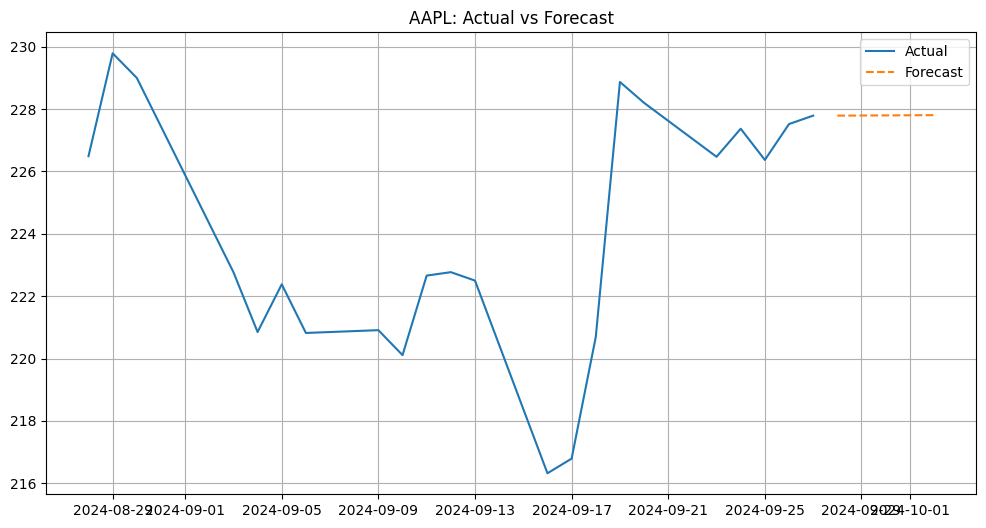

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='Actual')
plt.plot(pd.date_range(aapl_data['Date'].iloc[-1] + pd.Timedelta(days=1), periods=5), forecast, '--', label='Forecast')
plt.title('AAPL: Actual vs Forecast')
plt.legend()
plt.grid(True)
plt.show()